In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [5]:
corpus = """This is a sample sentence for n-gram demonstration."""

In [6]:
from nltk.util import ngrams
import tensorflow as tf

Here i imports the ngrams function from the nltk.util module and the TensorFlow library as tf.

In [7]:
words = nltk.word_tokenize(corpus)

the nltk.word_tokenize() function to tokenize the words in the "corpus" variable, which is a text document or string. The result is a list of individual words from the text.

In [8]:
n = 5

In [9]:
ngrams_list = (ngrams(words, n))

the nltk.util.ngrams() function to generate n-grams from the list of words stored in the "words" variable. The "n" represents the number of words in each n-gram. The "ngrams_list" variable will store the list of generated n-grams.

In [10]:
for ngram in ngrams_list:
  print(ngram)

('This', 'is', 'a', 'sample', 'sentence')
('is', 'a', 'sample', 'sentence', 'for')
('a', 'sample', 'sentence', 'for', 'n-gram')
('sample', 'sentence', 'for', 'n-gram', 'demonstration')
('sentence', 'for', 'n-gram', 'demonstration', '.')


This code snippet iterates through the "ngrams_list" and prints each n-gram on a separate line. It displays the generated n-grams one by one.

In [11]:
# Word-level one-hot encoding (toy example)
samples = ['the cat sat on the mat.', 'the dog ate my homework.']

In [12]:
token_index = {}
for sample in samples:
  for word in sample.split():
    if word  not in token_index:
      token_index [word] = len(token_index) + 1

Here i creates a "token_index" dictionary to map each unique word in the "samples" list to an integer index. It iterates through the samples, splits them into words, and assigns a unique index to each word in the dictionary.

In [13]:
max_length = 10
import numpy as np
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))

A 3D NumPy array "results" to store one-hot encoded representations of words in each sample. The array's dimensions are determined by the number of samples, the maximum length of a sample in words, and the number of unique words in the "samples" list.

In [14]:
for i, sample in enumerate(samples):
  for j , word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i , j, index] = 1.


Through each sample and word in "samples," creating a one-hot encoded representation for each word in "results" using the "token_index" dictionary. The representation is determined by the word's index in the dictionary and its position in the sample, limited to the maximum length specified.

In [15]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [16]:
#Character-level one-hot encoding (toy example)
import string
samples = ['the cat sat on the mat.', 'the dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters)+ 1), characters))
max_lenght = 50
results = np.zeros((len(samples), max_lenght, max(token_index.keys())+ 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

Here i tokenizes each character in the "samples" list and one-hot encodes them based on the "characters" dictionary, where each character is associated with a unique index. The maximum sequence length is set to 50, and the encoded characters are stored in the "results" array, where the third dimension represents the one-hot encoded character representation for each sample.

In [17]:
#Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer
samples = ['the cat sat on the mat.', 'the dog ate my homework.']
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)
sequence = tokenizer.fit_on_sequences(samples)
one_hot_result = tokenizer.texts_to_matrix(samples, mode = 'binary')

Here i utilizes Keras Tokenizer to tokenize the "samples" text data and convert it into sequences of word indices. It then performs one-hot encoding on the sequences using the texts_to_matrix method with mode='binary', resulting in a binary matrix representation of the presence or absence of words in the "samples" data.

In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [19]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

the "samples" list is tokenized and converted into one-hot encoded representations with a fixed dimensionality of 1000 and a maximum sequence length of 10 words. A hash function is used to map each word to an index within the fixed dimensionality, and the one-hot encoded representation is stored in the "results" array.

In [2]:
from keras.layers import Embedding
#Instantiating an Embedding layer
embedding_layer = Embedding(1000, 64)

An Embedding layer is instantiated with 1000 as the input dimension (vocabulary size) and 64 as the output dimension (embedding size). The Embedding layer will be used to convert integer sequences into dense word embeddings during model training.

In [3]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) =imdb.load_data(num_words= max_features)
import tensorflow as tf

17464789/17464789 [==============================] - 0s 0us/step


The IMDB movie review dataset is loaded using Keras, and the dataset is preprocessed. The dataset is limited to the top 10,000 most frequently occurring words (max_features) to reduce the vocabulary size. Additionally, the maximum length of each review is set to 20 (maxlen) by truncating or padding the sequences. The training and testing data are split into input sequences (x_train and x_test) and their corresponding labels (y_train and y_test). The TensorFlow library is also imported for future use.

In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

The IMDb movie review dataset from Keras and pads the input sequences to a fixed length of 20 for both training and testing data. This ensures that all sequences have the same length, making them suitable for training a neural network mode

In [5]:
# Using an Embedding layer and classifier on the IMDB
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Embedding(10000,8, input_length= maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

 A Sequential model in Keras for sentiment analysis. It uses an Embedding layer with input dimension 10,000, output dimension 8, and input length of 20. The output from the Embedding layer is flattened and passed through a Dense layer with a single neuron and sigmoid activation function for binary classification.







In [6]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = (['acc']))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

We train the defined model using the training data (x_train and y_train) for 10 epochs with a batch size of 32. It also validates the model on a validation set, which is 20% of the training data, using the validation_split parameter. The training progress and validation metrics are stored in the history object for later analysis.

In [ ]:

!wget  http://mng.bz/0tIo/aclImdb.zip
#!unzip '/content/aclImdb.zip'

I used the wget utility to download the ACL IMDB dataset zip file from the provided URL (http://mng.bz/0tIo/aclImdb.zip) to the current working directory in the Colab environment.

In [ ]:
!unzip '/content/aclImdb.zip'

In [94]:
# Processing the labels of the raw IMDB data
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname [-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

 The IMDB dataset is loaded from the 'train' directory, and the labels and texts are extracted from the positive ('pos') and negative ('neg') review files. Each review's text is appended to the 'texts' list, and the corresponding sentiment label (0 for negative, 1 for positive) is appended to the 'labels' list.

In [95]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

The Tokenizer class from Keras is imported for text preprocessing, and the pad_sequences function from TensorFlow's Keras API is imported for sequence padding. The numpy library is also imported as np. These imports are typically used in natural language processing tasks to tokenize and preprocess text data before feeding it into machine learning models.

In [96]:
maxlen = 100
training_samples =100
validation_samples=10000
max_words =10000


In [97]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_sequences(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

 I initialize a Tokenizer object with a specified number of maximum words, then fits it on the list of texts. It converts the texts into sequences of integers based on the fitted tokenizer and creates a word index dictionary.

In [98]:
print ('Found %s unique tokens. ' % len(word_index))

Found 0 unique tokens. 


In [99]:
data = pad_sequences(sequences, maxlen = maxlen)
labels = np.array(labels)

Pads the sequences of integers (data) to a fixed maximum length (maxlen) using the pad_sequences function from Keras. It ensures that all sequences have the same length by padding or truncating them. It also converts the list of labels to a NumPy array (labels) for further processing

In [100]:
print('shape of data tensor is :  ', data.shape)
print('shape of labels tensor is :', labels.shape)

shape of data tensor is :   (25000, 100)
shape of labels tensor is : (25000,)


In [101]:
indices = np.arange(data.shape[0])

In [102]:
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

The shuffles the indices of the data (sequences) and labels using np.random.shuffle. This step is essential for randomizing the order of the data and labels, which helps to ensure unbiased training and avoid potential ordering-related biases. It then reassigns the data and labels according to the new shuffled order, so they are ready for further processing and model training.

In [103]:
x_train = data[: training_samples]
y_train = labels [: training_samples]
x_val = data[training_samples: training_samples+ validation_samples]
y_val = labels [training_samples: training_samples+validation_samples]

Splitting the shuffled data and labels into training and validation sets. It assigns the first "training_samples" data points and corresponding labels to "x_train" and "y_train," respectively. The next "validation_samples" data points and labels are assigned to "x_val" and "y_val," respectively. This process creates separate datasets for training and validation, which are commonly used to evaluate and fine-tune the model's performance during training.

In [114]:
! pip install wget

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

The command !wget https://nlp.stanford.edu/data/glove.6B.zip is used to download the GloVe word embeddings file in the form of a zip archive. The file contains pre-trained word vectors that can be used as word embeddings in various natural language processing tasks. GloVe (Global Vectors for Word Representation) is a popular word embedding technique that captures semantic relationships between words based on word co-occurrence statistics from a large corpus of text.

In [23]:
! unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [73]:
glove_dir = '/content'

In [104]:
embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  words = values [0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[words] = coefs
f.close()
print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


I am reading the GloVe word embeddings file 'glove.6B.100d.txt' and extracting word vectors to create an embedding_index dictionary. Each word in the GloVe file corresponds to a pre-trained word vector of dimension 100. The loop reads each line of the file, splits it to separate the word and its corresponding vector values, and converts the vector values to a NumPy array with data type 'float32'. These word vectors are then stored in the embedding_index dictionary, where the word serves as the key and the word vector as the value. Finally, the code prints the number of word vectors found in the file.

In [75]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector


I create an embedding_matrix to hold pre-trained word embeddings for our neural network. The matrix is initialized with zeros and has dimensions (max_words, embedding_dim). We then iterate through the word index, retrieving pre-trained word vectors from the embedding_index dictionary and storing them in the corresponding rows of the embedding_matrix. This enables us to leverage the semantic information of the pre-trained word vectors during training in our NLP tasks.

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                320032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


 I create a sequential neural network model for sentiment analysis. The model starts with an Embedding layer with input dimensions max_words, embedding dimensions embedding_dim, and input length maxlen. The embedding layer is initialized with the embedding_matrix obtained from pre-trained GloVe word embeddings and is set to be non-trainable. The model then continues with a Flatten layer followed by two dense layers with 'relu' and 'sigmoid' activations, respectively. The summary of the model shows the layer configuration and the number of trainable parameters.

In [77]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs= 20, batch_size = 32, validation_data=(x_val, y_val) )

In [31]:
model.save_weights('pre_trained_glove_model.h5')

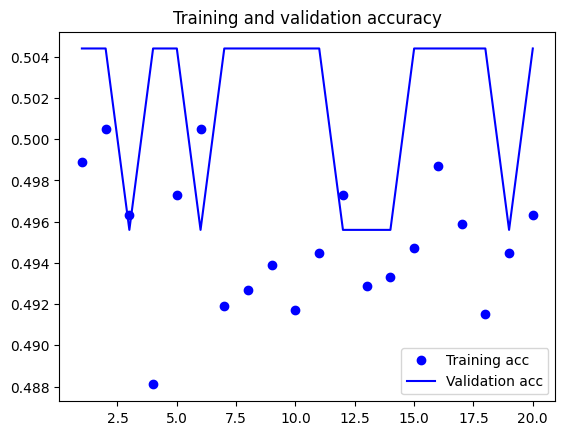

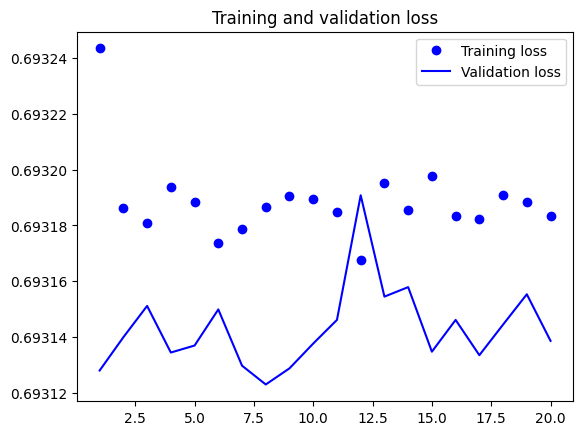

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [108]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texets = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname [-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
sequences = tokenizer.texts_to_sequences(texts[25000:50000])
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

 I load the test data from the 'aclImdb' dataset by reading text files from the 'test' directory and assigning corresponding labels (0 for negative and 1 for positive). We then tokenize and pad the text sequences using the same tokenizer and maximum length as before. Finally, the sequences are stored in x_test, and the labels are converted into a numpy array and stored in y_test.

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

I load the pre-trained model weights stored in 'pre_trained_glove_model.h5' using the load_weights method of the model. Then, we evaluate the model's performance on the test data (x_test) and corresponding labels (y_test) using the evaluate method. The evaluation results, such as loss and accuracy, will be returned and printed to assess the model's performance on the test dataset